<a href="https://colab.research.google.com/github/flowerfatih/Global-AI-HUB-Bootcamp/blob/main/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf



In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
422/422 [==============================] - 6s 8ms/step - loss: 0.3686 - accuracy: 0.8888 - val_loss: 0.0807 - val_accuracy: 0.9783
Epoch 2/50
422/422 [==============================] - 4s 8ms/step - loss: 0.1167 - accuracy: 0.9641 - val_loss: 0.0600 - val_accuracy: 0.9828
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0888 - accuracy: 0.9729 - val_loss: 0.0495 - val_accuracy: 0.9868
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0420 - val_accuracy: 0.9888
Epoch 5/50
422/422 [==============================] - 3s 6ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0457 - val_accuracy: 0.9880
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 7/50
422/422 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0352 - val_accuracy: 0.9908
Epoch 

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.025713056325912476
Test accuracy: 0.9930999875068665


In [6]:
import matplotlib.pyplot as plt
import cv2

In [17]:
img = cv2.imread("/content/WhatsApp Image 2022-09-21 at 17.06.38.jpeg", cv2.IMREAD_GRAYSCALE)

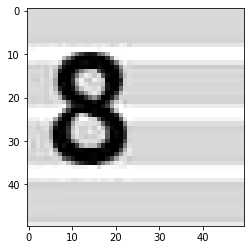

In [18]:
plt.imshow(img, cmap="gray")

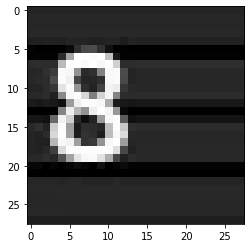

In [19]:
img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)
plt.imshow(img_resized, cmap="gray")

In [20]:
img_resized.shape

(28, 28)

In [21]:
img_resized = img_resized.astype("float32") / 255

img_resized.shape

(28, 28)

In [31]:
np.expand_dims(img_resized,0).shape

(1, 28, 28)

In [32]:
res = model.predict(np.expand_dims(img_resized,0))

In [33]:
res.argmax()

4